**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**


Importing the Dependencies


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

Loading the MNIST data from keras.datasets


In [12]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [15]:
import urllib.request

url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
urllib.request.urlretrieve(url, "mnist.npz")
print("Download complete.")




Download complete.


Training data = 60,000 Images

Test data = 10,000 Images


Image dimension --> 28 x 28

Grayscale Image --> 1 channel


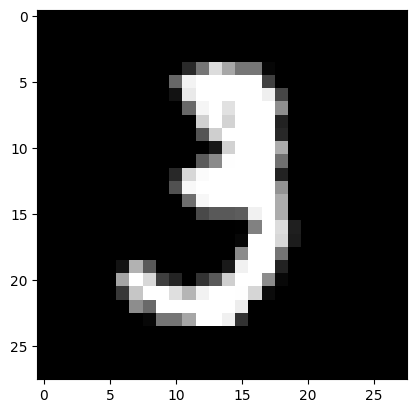

In [16]:
# print the 10th image
plt.imshow(X_train[10], cmap='gray')



In [17]:
# print 10 th image shape
print(X_train[10].shape)


(28, 28)


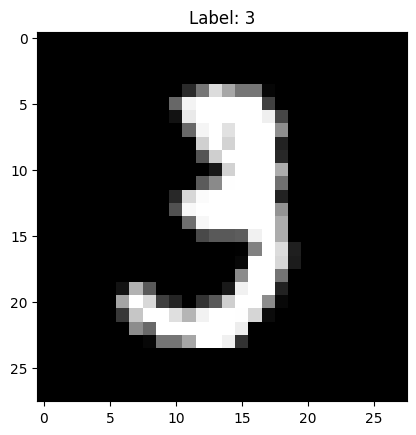

In [18]:
# displaying the image
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {Y_train[10]}")
plt.show()

# print the corresponding label


Image Lables


In [30]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [28]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension


In [29]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [22]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network


In [24]:
# setting up the layers of the Neural  Network
from keras import Input

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



In [26]:
# compiling the Neural Network
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [33]:
# training the Neural Network

model.fit(
    X_train,
    Y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5930 - loss: 1.3196 - val_accuracy: 0.8987 - val_loss: 0.3725
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8772 - loss: 0.4203 - val_accuracy: 0.9202 - val_loss: 0.2916
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8998 - loss: 0.3426 - val_accuracy: 0.9280 - val_loss: 0.2550
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9099 - loss: 0.3112 - val_accuracy: 0.9343 - val_loss: 0.2350
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9197 - loss: 0.2736 - val_accuracy: 0.9437 - val_loss: 0.2009
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9292 - loss: 0.2442 - val_accuracy: 0.9485 - val_loss: 0.1824
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9372 - loss: 0.2164 - val_accuracy: 0.9565 - val_loss: 0.1658
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9428 - loss: 0.1980 - 

In [32]:
from keras.utils import to_categorical

Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)


In [34]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train_encoded, verbose=0)
print(f"Training data accuracy = {train_accuracy * 100:.2f}%")


Training data accuracy = 95.57%


Training data accuracy = Your Accuracy Here


**Accuracy on Test data:**


Test data accuracy = Write Accuracy Here


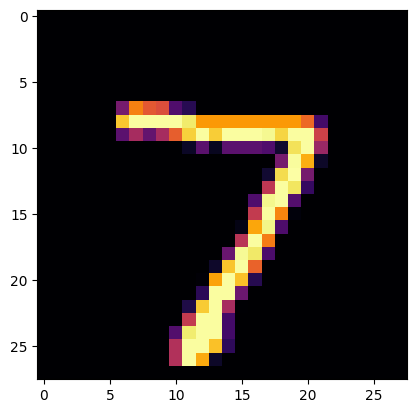

In [35]:
# first data point in X_test
plt.imshow(X_test[0], cmap='inferno')


In [36]:
print(Y_test[0])

7


In [37]:
#predict for X_test
y_pred_probs = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


model.predict() gives the prediction probability of each class for that data point


In [38]:
# convert the prediction probabilities to class label
predicted_label = np.argmax(y_pred_probs[0])
print(predicted_label)


7


In [40]:
# convert the prediction probabilities to class label for all test data points
Y_pred_labels = np.argmax(y_pred_probs, axis=1)


Y_test --> True labels

Y_pred_labels --> Predicted Labels


Confusin Matrix


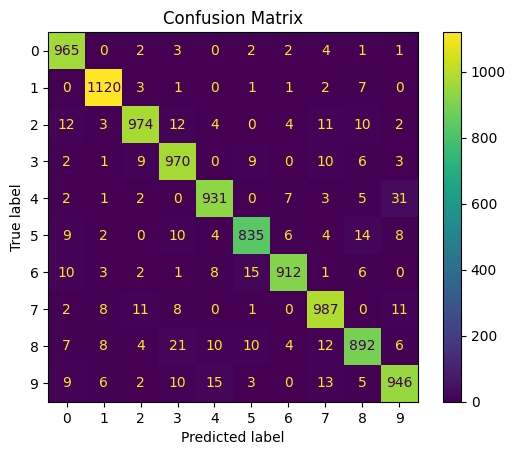

In [41]:
# Plot the confusion matrix between Y_test and Y_pred
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


Building a Predictive System


In [49]:
input_image_path = 'digit.png'

input_image = cv2.imread(input_image_path)

In [50]:
type(input_image)

numpy.ndarray

In [51]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


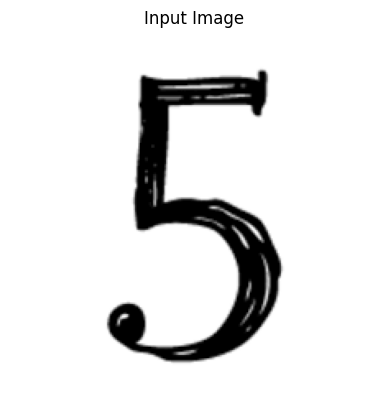

In [55]:
import matplotlib.pyplot as plt

plt.imshow(input_image, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()


In [56]:
input_image.shape

(225, 224, 3)

In [57]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [58]:
grayscale.shape

(225, 224)

In [59]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [60]:
input_image_resize.shape

(28, 28)

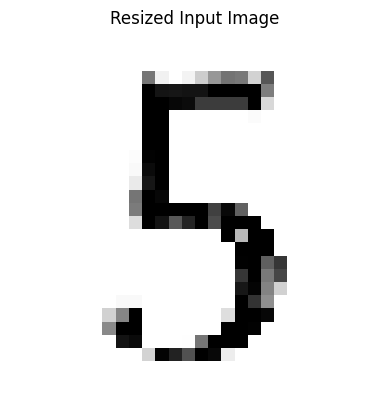

In [62]:


plt.imshow(input_image_resize, cmap='gray')
plt.title("Resized Input Image")
plt.axis('off')
plt.show()


In [63]:
input_image_resize = input_image_resize/255

In [64]:
type(input_image_resize)

numpy.ndarray

In [65]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [66]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [67]:
input_pred_label = np.argmax(input_prediction)

In [68]:
print(input_pred_label)

3


**Predictive System**


Path of the image to be predicted:  digit.png


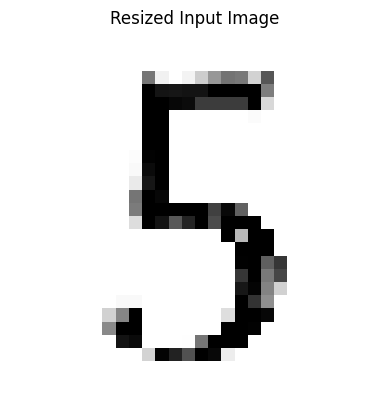

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The Handwritten Digit is recognised as  3


In [70]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image_resize, cmap='gray')
plt.title("Resized Input Image")
plt.axis('off')
plt.show()


grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)